In [15]:

import pandas as pd
import pyreadstat
import funcions_net
import numpy as np
from preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [16]:

df, meta = pyreadstat.read_sav("CEJFEAjut2015Updated.sav")

df_variables = pd.read_csv("variables.csv", sep=';')

dict = funcions_net.create_dict(meta)

print("Creem diccionari")


Creem diccionari


In [17]:
from crear_dataset import drop_all_columns

df = drop_all_columns(df, meta, df_variables, dict)


In [18]:
print("Mirem quants nans tenim a cada columna")
netejat,df = neteja_na_columns(df, llindar=0.6)

df = omple_nans(df)

print("Columnes netejades")
## fem label encoding de les columnes categòriques
df = label_encoding(df)


Mirem quants nans tenim a cada columna
Columnes netejades


c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\preprocessing.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net[col].fillna(mitjana, inplace=True)
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\preprocessing.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [19]:
num_columnes = df.shape[1]
print("Hem netejat les columnes i hem fet label encoding")
print("Tenim ", num_columnes, " columnes")

Hem netejat les columnes i hem fet label encoding
Tenim  388  columnes


In [20]:
## mirem la correlació de les columnes amb la variable objectiu

correlacio = df.corr()

correlacio = abs(correlacio['temps_fins_reincidencia1a'])

correlacio = correlacio.sort_values(ascending=False)

print(correlacio[0:25])

temps_fins_reincidencia1a       1.000000
Reincidencia_Juvenil_preCAPE    0.676726
EdatAD                          0.496726
SAVRYSoc                        0.421711
EdatD1mesuraInternament         0.392295
Pri_Ing                         0.390301
EdatT1mesuraInternament         0.386371
Nom_Exp                         0.377859
Total_Del                       0.367928
PCLxFAC_3                       0.356534
PCLjFAC_3                       0.355757
t_internamentCape               0.354630
SAVRYTot                        0.352350
nombre_fets_previs              0.339233
nDelictesViolents               0.335700
Del_Condem                      0.335141
fets_condemnat_preCAPE          0.324262
CAPEe_PT                        0.318598
SAVRYInd                        0.316342
intensitat_delictiva_total      0.316124
TRFMSocProbCat                  0.312838
TRFT_AP                         0.308670
YSRExtProbT                     0.308668
PCLoFAC_3                       0.301422
Pri_Exp         

In [21]:

print(correlacio[25:40])

YSRTotProbT         0.289834
YSRRulBeh           0.287305
VASTDir_3gr         0.286211
TempConeixTutor     0.284265
YSRExtProb          0.272544
TempConeixMestre    0.272478
Edat1erDelicte      0.270832
YSRDSMODD           0.270112
YSRDSMCD            0.267642
PCLeFAC_3           0.267302
YSRDSMCDT           0.264010
TRFMWithDepCat      0.263174
YSRTotProbCat       0.254174
TRFTExtProbCat      0.253546
YSRTotProb          0.248039
Name: temps_fins_reincidencia1a, dtype: float64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='temps_fins_reincidencia1a'), df['temps_fins_reincidencia1a'], test_size=0.2, random_state=42)


In [23]:
## normalitzem les dades
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)



In [24]:
## fem un pca
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

pca = PCA(n_components=25)
kpca = KernelPCA(n_components=25, kernel='linear', alpha=1.0)  # alpha actua com a paràmetre de regularització
spca = SparsePCA(n_components=25, alpha=1.0)  # alpha actua com a paràmetre de regularització

pca.fit(X_train)
kpca.fit(X_train)
spca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_train_kpca = kpca.transform(X_train)
X_train_spca = spca.transform(X_train)

In [25]:
param_grid = {
    'alpha': [
        0.01, 0.1, 1, 10, 100, 1000, 10000
    ]
}
lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_pca = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_kpca = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_spca = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)
grid_search_pca.fit(X_train_pca, y_train)
grid_search_kpca.fit(X_train_kpca, y_train)
grid_search_spca.fit(X_train_spca, y_train)

print("Resultat sense pca")
print(grid_search.best_params_)
print("Resultat pca")
print(grid_search_pca.best_params_)
print("Resultat kpca")
print(grid_search_kpca.best_params_)
print("Resultat spca")
print(grid_search_spca.best_params_)

## 
print("Resultat sense pca")
print(grid_search.cv_results_['mean_test_score'])
print("Resultat pca")
print(grid_search_pca.cv_results_['mean_test_score'])
print("Resultat Kpca")
print(grid_search_kpca.cv_results_['mean_test_score'])
print("Resultat spca")
print(grid_search_spca.cv_results_['mean_test_score'])



c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.291e+03, tolerance: 1.801e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.225e+03, tolerance: 1.835e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

Resultat sense pca
{'alpha': 0.1}
Resultat pca
{'alpha': 100}
Resultat kpca
{'alpha': 100}
Resultat spca
{'alpha': 1000}
Resultat sense pca
[-501580.9611399  -317683.20054068 -363574.37234282 -350929.57175125
 -395746.89190761 -366224.50595311 -366224.50595311]
Resultat pca
[-498225.59391993 -497748.68024702 -493038.54376023 -453005.13045922
 -351315.51186798 -369648.66836511 -366224.50595311]
Resultat Kpca
[-498225.59391993 -497748.68024702 -493038.54376022 -453005.13045921
 -351315.51186798 -369648.66836511 -366224.50595311]
Resultat spca
[-368050.75818981 -368039.67717095 -368000.66430442 -370679.16394415
 -384077.05255812 -366224.50595311 -366224.50595311]


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Definim el param_grid
param_grid = {
    'max_depth': [15,20,25],
    'n_estimators': [100,200,500]
}

# Definim el model de Random Forest
rf = RandomForestRegressor()

# Configurem el GridSearchCV
grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

# Realitzem el Grid Search
grid_search.fit(X_train, y_train)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió:", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

# Mostrem la mitjana dels resultats de test
print("Mitjana dels resultats de test per cada combinació:")
print(grid_search.cv_results_['mean_test_score'] * -1)  # Multipliquem per -1 per obtenir el MSE positiu


Millor paràmetre: {'max_depth': 20, 'n_estimators': 500}
Millor precisió: 350217.4489926267
Mitjana dels resultats de test per cada combinació:
[382438.68134    353675.1708156  352771.60356302 374185.78287067
 363524.743051   350217.44899263 366723.85545733 350883.3581145
 369963.13912864]


In [27]:
print(grid_search.cv_results_['mean_test_score'] * -1)  # Multipliquem per -1 per obtenir el MSE positiu


[382438.68134    353675.1708156  352771.60356302 374185.78287067
 363524.743051   350217.44899263 366723.85545733 350883.3581145
 369963.13912864]


Millor valor d'alpha: 1000
Coeficients: [-173.79225059 -104.12369089  -34.0783664 ]
MSE: 540835.5319875504


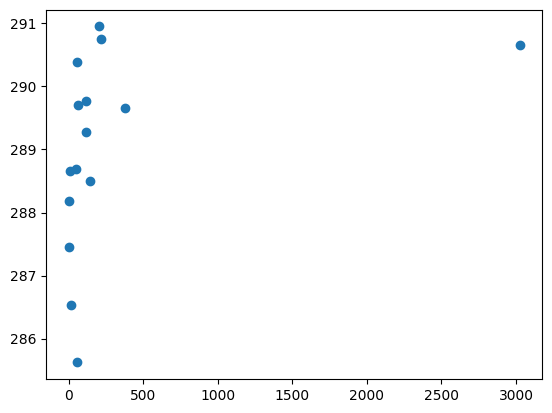

In [28]:
## Provem de fer una regressió de Lasso

## Fem reg
param_grid = {
    'alpha': [1, 100,1000]
}

# Crea el model Lasso
lasso = Lasso()
# Aplica GridSearchCV per trobar el millor alpha
grid_search = GridSearchCV(lasso, param_grid, cv=10)
grid_search.fit(X_train_pca, y_train)

millor_alpha = grid_search.best_params_['alpha']
# Mostra el millor valor d'alpha
print("Millor valor d'alpha:", millor_alpha)
print("Coeficients:", grid_search.cv_results_['mean_test_score'])

lasso = Lasso(alpha=millor_alpha, max_iter=100000)
lasso.fit(X_train_pca, y_train)

X_test = scaler.transform(X_test)
X_test_pca = pca.transform(X_test)

y_pred = lasso.predict(X_test_pca)

print("MSE:", mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred)